In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Platinum.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,933.5,930.5,933.5,930.5,1/1/2018
1,931.0,945.5,946.5,931.0,1/2/2018
2,945.0,957.0,961.0,940.5,1/3/2018
3,955.0,964.0,966.5,945.0,1/4/2018
4,963.0,969.5,970.5,959.5,1/5/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

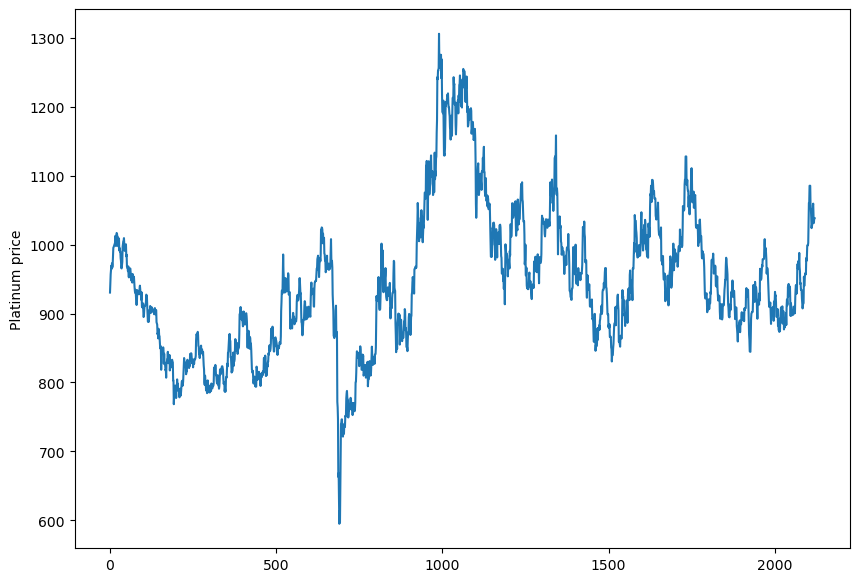

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Platinum price")
plt.show()


In [6]:
t = .6
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.1870224098256787
c:  813.8458434614416


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1051.738349
1,1051.925371
2,1052.112394
3,1052.299416
4,1052.486438
...,...
844,1209.585263
845,1209.772285
846,1209.959307
847,1210.146330


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 18.385339413677126
Mean Squared Error (MSE): 36189.59241550323
Root Mean Squared Error (RMSE): 190.23562341344808


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[1210.5203747  1210.70739711 1210.89441952 1211.08144193 1211.26846434
 1211.45548675 1211.64250916 1211.82953157 1212.01655398 1212.20357639
 1212.3905988  1212.57762121 1212.76464362 1212.95166603 1213.13868844
 1213.32571085 1213.51273326 1213.69975567 1213.88677808 1214.07380049
 1214.2608229  1214.44784531 1214.63486772 1214.82189013 1215.00891254
 1215.19593495 1215.38295736 1215.56997977 1215.75700218 1215.94402459
 1216.131047   1216.31806941 1216.50509182 1216.69211423 1216.87913664
 1217.06615905 1217.25318146 1217.44020387 1217.62722628 1217.81424868
 1218.00127109 1218.1882935  1218.37531591 1218.56233832 1218.74936073
 1218.93638314 1219.12340555 1219.31042796 1219.49745037 1219.68447278
 1219.87149519 1220.0585176  1220.24554001 1220.43256242 1220.61958483
 1220.80660724 1220.99362965 1221.18065206 1221.36767447 1221.55469688
 1221.74171929 1221.9287417  1222.11576411 1222.30278652 1222.48980893
 1222.67683134 1222.86385375 1

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

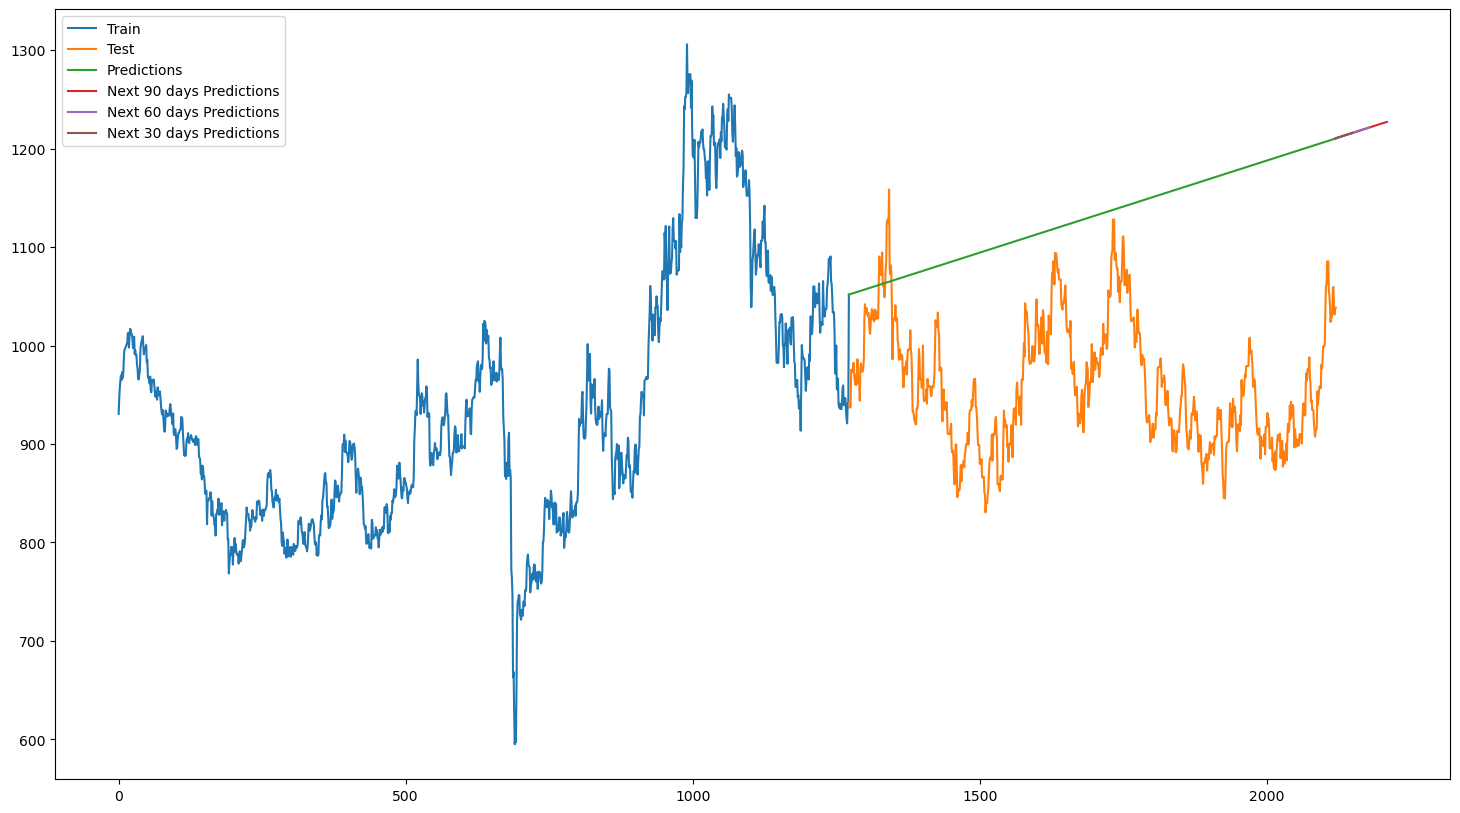

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()